# KMeans 

In [1]:
from sklearn.cluster import KMeans
import numpy as np

In [2]:
X = np.array([[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]])


In [3]:
X

array([[ 1,  2],
       [ 1,  4],
       [ 1,  0],
       [10,  2],
       [10,  4],
       [10,  0]])

In [4]:
kmeans = KMeans(n_clusters=2, random_state=0)

In [5]:
kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

In [7]:
kmeans.labels_

array([1, 1, 1, 0, 0, 0])

In [13]:
label = kmeans.labels_

In [9]:
np.array([[0,0],[12,3]])

array([[ 0,  0],
       [12,  3]])

In [10]:
kmeans.predict([[0,0],[12,3]])

array([1, 0])

In [11]:
kmeans.cluster_centers_

array([[10.,  2.],
       [ 1.,  2.]])

In [14]:
from sklearn.metrics import silhouette_score #[-1 to 1]

In [15]:
silhouette_score(X,label)

0.7133477791749615

In [16]:
#### Now trying to claculate Silhouette score with 3 cluster i.e n_clusters = 3
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

In [17]:
kmeans.labels_

array([1, 1, 1, 0, 0, 2])

In [18]:
label = kmeans.labels_

In [19]:
kmeans.predict([[0,0],[12,3]])

array([1, 0])

In [20]:
silhouette_score(X,label)

0.43630092057240805

In [23]:
kmeans.inertia_ # this ia also called WCSS(within cluster sum of square)

10.0

In [25]:
wcss = []

for i in [2,3]:
    kmeans = KMeans(n_clusters=i,init = 'k-means++', random_state=40)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [26]:
wcss

[16.0, 10.0]

In [29]:
import matplotlib.pyplot as plt


Text(0, 0.5, 'WCSS')

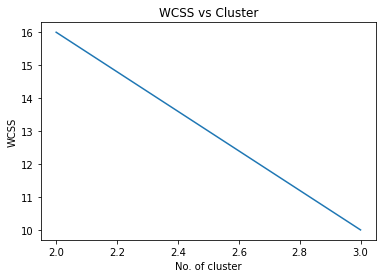

In [35]:
plt.plot([2,3],wcss)
plt.title('WCSS vs Cluster')
plt.xlabel("No. of cluster")
plt.ylabel("WCSS")

# Heirarchical clustering

In [36]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],[4, 2], [4, 4], [4, 0]])

In [37]:
X

array([[1, 2],
       [1, 4],
       [1, 0],
       [4, 2],
       [4, 4],
       [4, 0]])

In [38]:
clustering = AgglomerativeClustering()

In [39]:
clustering.fit(X)

AgglomerativeClustering()

In [40]:
clustering.labels_

array([1, 1, 1, 0, 0, 0], dtype=int64)

In [41]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

In [42]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [47]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [ ]:
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()